# Assignment 8

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).

---

#### ``Objectives``
1. Implement K-means clustering

#### ``Motivation``

[The RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) is an additive color model in which the red, green, and blue primary colors of light are added together in various ways to reproduce a broad array of colors.

There are plenty of RGB-to-color converters on the web
https://www.rapidtables.com/convert/color/rgb-to-hex.html

These two RGB triples look almost identical to the human eye:
- [0, 0, 255]
- [0, 1, 255]

However there is no "reverse lookup" that tells you that "this color is close to blue" unless it is a [basic](https://en.wikipedia.org/wiki/Web_colors#Basic_colors) or [extended](https://en.wikipedia.org/wiki/Web_colors#Extended_colors) color with a specified RGB value.

#### ``Data``

For this assignment you are provided a file with RGB triples.

### Import libraries

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import sys
import os

---
### Step 1: Data ingestion

The RGB color data we will import was sourced from a collection of digital ad images. The project's objective was to determine if certain colors were indicative of high-performing ads.

Before creating a predictive model, it was essential to classify the colors of the RGB triples present in the images.

It's important to note that if the color values were uniformly distributed, clustering would not provide any valuable insights.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
assignments_folder_path = '/content/drive/MyDrive/Colab Notebooks/w207/w207 Assignments'
os.chdir(assignments_folder_path)

In [ ]:
# read data
data_file = "./HW08_rgb_colors.csv"
df_colors = pandas.read_csv(data_file)

#### <span style="color:chocolate"> Exercise 1:</span> Getting to know the data (10 points)

Answer the following questions:
    
1. How many columns does the dataset contain?
2. How many rows are there in the dataset?
3. What are the column names?
4. Print the first five examples in the dataset.

In [ ]:
# YOUR CODE HERE

# 1. Number of columns in this dataset
print("1. Number of columns in df_colors:", df_colors.columns.shape[0], '\n')

# 2. Number of rows in this dataset
print("2. Number of rows in df_colors:", df_colors.index.shape[0], '\n')

# 3. Column names
print("3. Column names of df_colors:")
print(list(df_colors.columns), '\n')

# 4. First 5 examples in this dataset
print("4. Printing the first five examples in df_colors:")
print(df_colors[:5])

1. Number of columns in df_colors: 3 

2. Number of rows in df_colors: 2030 

3. Column names of df_colors:
['red', 'green', 'blue'] 

4. Printing the first five examples in df_colors:
   red  green  blue
0  233    197   146
1  183     97    58
2  188     84     7
3  247    252   254
4  248    253   253


---
### Step 2: Exploratory Data Analysis (EDA)

#### <span style="color:chocolate"> Exercise 2:</span> 3D plot of RGB colors (10 points)

To visually confirm that similar colors are located close to each other in the 3-dimensional RGB space:

1. Use the <span style="color:chocolate"> matplotlib</span> library to plot the RGB components and verify this relationship (use the colors array defined below to specify the color for each data point).

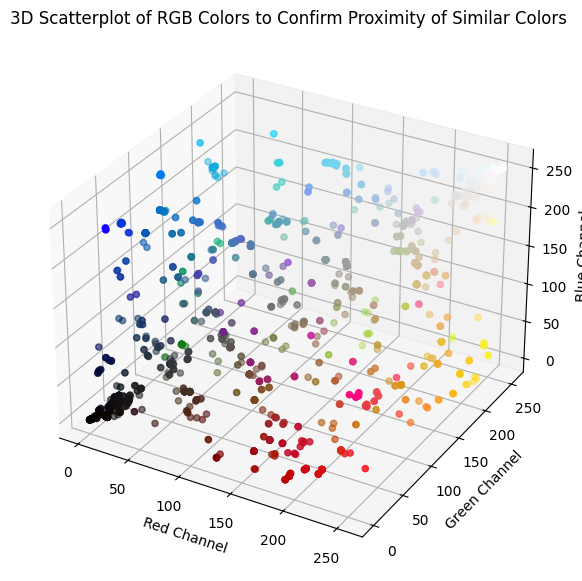

In [ ]:
# define colors
colors = np.array(df_colors.values)/255 # colors need to be (r,b,g) tuple in the range of 0-1

# create the 3D scatter plot
## YOUR CODE HERE ##

# Setting fig and ax for 3D scatterplot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Getting the scatterplot and labeling axes/title
ax.scatter(df_colors['red'], df_colors['green'], df_colors['blue'], c=colors, marker='o')
ax.set_xlabel("Red Channel")
ax.set_ylabel("Green Channel")
ax.set_zlabel("Blue Channel")
ax.set_title("3D Scatterplot of RGB Colors to Confirm Proximity of Similar Colors")

# Show plot
plt.show()

In [ ]:
print("It does appear that the colors are where they are supposed to be. I")
print("will caveat this by saying that I'm colorblind, but even judging by the")
print("shades of the colors reveals that they are roughly where they're")
print("supposed to be.")

It does appear that the colors are where they are supposed to be. I
will caveat this by saying that I'm colorblind, but even judging by the
shades of the colors reveals that they are roughly where they're
supposed to be.


---
### Step 3: Clustering algorithm

Clustering algorithms are essential tools for exploring and understanding data patterns without prior knowledge of labels or categories. In this assignment, we will explore the KMeans clustering algorithm.

#### <span style="color:chocolate"> Exercise 3:</span> KMeans (10 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">fit_kmeans()</span> function below.

2. Fit a KMeans model with 10 clusters. Make sure to pass the random_state argument;

3. Use the <span style="color:chocolate"> predict() </span> method to get the cluster predictions for each data point;
   
5. Add the cluster predictions to the <span style="color:chocolate"> df_colors </span> dataframe.

In [ ]:
# set params
n_clusters = 10
random_state = 10  # makes sure you get the same results each time

# create a np array for RBG values
X = np.array(df_colors.values)

# define KMeans model
def fit_kmeans(X, n_clusters, random_state):
  ## YOUR CODE HERE ##
  model = KMeans(n_clusters, init='k-means++', n_init=10, max_iter=300,
                 tol=1e-04, random_state=random_state).fit(X)
  return model

# fit KMeans model
## YOUR CODE HERE ##
fit_km = fit_kmeans(X, n_clusters, random_state)

# get cluster predictions
## YOUR CODE HERE ##
y_km = fit_km.predict(X)

# add predictions to df_colors
## YOUR CODE HERE ##
df_colors['cluster'] = y_km

In [ ]:
df_colors

,red,green,blue,cluster
0,233,197,146,1
1,183,97,58,7
2,188,84,7,7
3,247,252,254,3
4,248,253,253,3
...,...,...,...,...
2025,27,123,141,9
2026,194,193,198,1
2027,41,113,197,4
2028,35,114,197,4


---
### Step 4: Statistics

#### <span style="color:chocolate"> Exercise 4:</span> Distribution of clusters (10 points)

1. Analyze the distribution of clusters using a histogram plot. Set the numbers of bins to 10.
2. Ensure that your visual representation aligns with the results obtained from
<span style="color:chocolate"> df_colors['cluster'].value_counts()</span>.

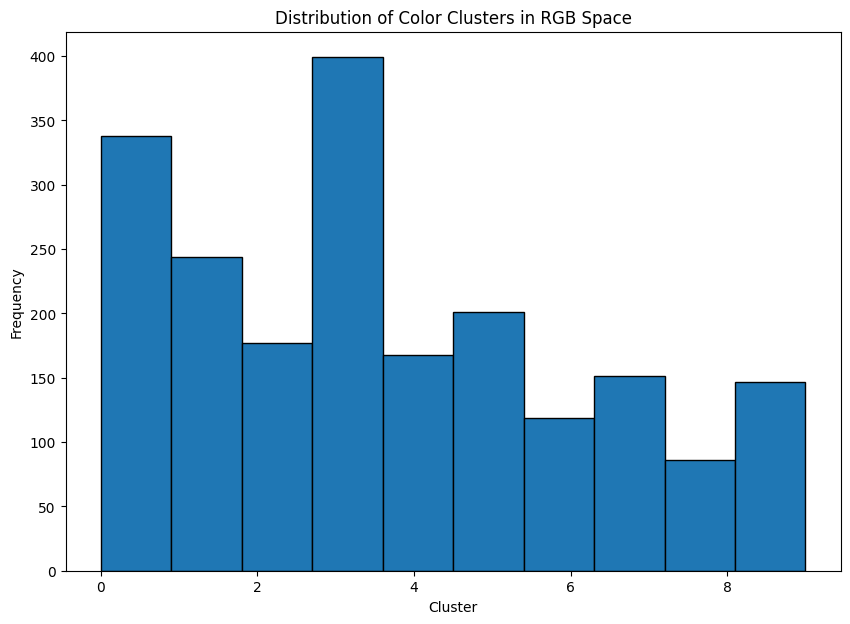

In [ ]:
# YOUR CODE HERE

# Analyzing the distribution of clusters using a histogram
plt.figure(figsize=(10, 7))
plt.hist(df_colors['cluster'], bins=10, edgecolor='black')
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.title("Distribution of Color Clusters in RGB Space")

# Showing the plot
plt.show()

In [ ]:
# Ensuring that the visual representation aligns with the results obtained from
# df_colors['cluster'].value_counts()
df_colors['cluster'].value_counts()

,count
cluster,
3,399
0,338
1,244
5,201
2,177
4,168
7,151
9,147
6,119


In [1]:
print("It does appear that the histogram matches the results obtained from")
print("df_colors['cluster'].value_counts(). Notably, cluster 3 has the highest")
print("count, cluster 0 has the second highest, and cluster 8 has the lowest.")

It does appear that the histogram matches the results obtained from
df_colors['cluster'].value_counts(). Notably, cluster 3 has the highest
count, cluster 0 has the second highest, and cluster 8 has the lowest.


#### <span style="color:chocolate"> Exercise 5:</span> Distribution of colors by cluster (10 points)

Plot the color distribution for each cluster using the first 500 examples in the <span style="color:chocolate"> df_colors</span> data.
 - ensure clusters are on the y-axis and the first 500 examples are on the x-axis.
 - use the **mini_colors** array provided below for the color argument in the plot function.


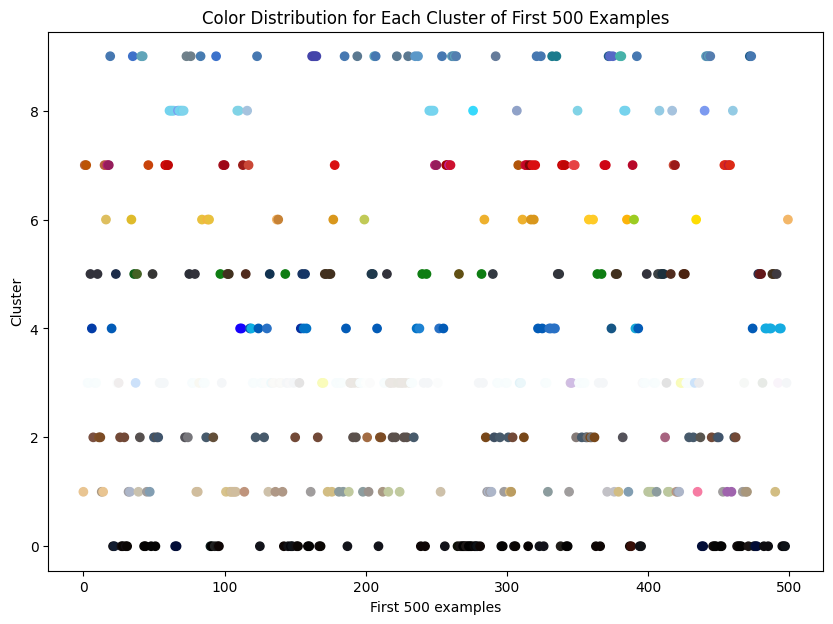

In [ ]:
# define colors
mini_colors = colors[:500]

# YOUR CODE HERE
# Plotting the color distribution for each cluster using mini_colors
plt.figure(figsize=(10, 7))
plt.scatter(range(500), df_colors['cluster'][:500], c=mini_colors)
plt.xlabel("First 500 examples")
plt.ylabel("Cluster")
plt.title("Color Distribution for Each Cluster of First 500 Examples")

# Showing the plot
plt.show()

#### <span style="color:chocolate"> Exercise 6:</span> Cluster centroids (10 points)

Retrieve the centroids of each cluster using the <span style="color:chocolate"> cluster_centers_</span> attribute of the fitted KMeans object.

In [ ]:
# YOUR CODE HERE
centroids = fit_km.cluster_centers_

In [ ]:
# Showing what the centroids for each cluster are:
centroids

array([[ 13.74260355,  12.25739645,  16.14201183],
       [184.58606557, 176.51229508, 159.07377049],
       [105.57627119,  87.23163842,  84.37853107],
       [244.11278195, 246.61904762, 246.12531328],
       [ 12.80357143, 102.625     , 199.4047619 ],
       [ 47.96517413,  65.42288557,  46.38308458],
       [224.60504202, 181.31092437,  42.06722689],
       [192.65562914,  29.58940397,  38.8013245 ],
       [117.74418605, 203.88372093, 229.1627907 ],
       [ 71.10884354, 128.81632653, 168.41496599]])

Next, let's **create a color dictionary** to give color names to each centroid. You will need this dictionary to solve Exercise 7-8.

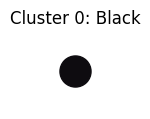

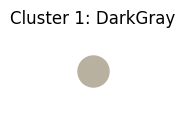

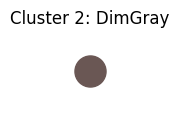

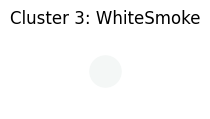

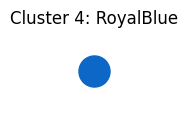

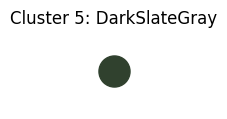

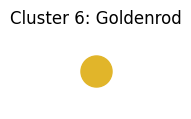

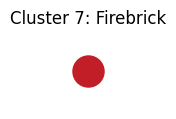

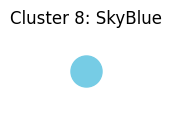

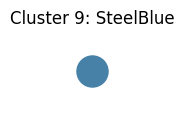

In [ ]:
# get the current directory of the script
current_script_dir = os.path.abspath(os.getcwd())

# navigate one directory forward
# next_dir = os.path.join(current_script_dir, 'data/RGB_colors/')
# ^Not necessary since HW08_color_names.py is already in current directory

# add next_dir to sys.path to make it the current working directory
# sys.path.insert(0, next_dir)
# ^Again, not necessary since we're already in the correct directory

# import HW08_color_names.py
import HW08_color_names

# get closer name for rgb
color_dict = HW08_color_names.get_closest_name_for_rgb(centroids)

# def show_color() function
def show_color(test_color, title):
  # normalize
  c = [ cc/255 for cc in test_color]

  # some random coordinates
  x=[1]
  y = [1]

  # plot a large dot
  fig = plt.figure(figsize=(1, 1))
  plt.scatter(x,y,color=c,s=500)
  plt.title(title)
  plt.axis('off')
  return(plt)

# call show_color() function
for cluster in range(n_clusters):
    show_color(centroids[cluster],f'Cluster {cluster}: {color_dict[cluster]}')

---
### Step 5: Test examples

#### <span style="color:chocolate"> Exercise 7:</span> Best guess for an RGB triple based on centroids (20 points)

Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">guess_color()</span> function below to determine the closest centroid to a user-defined RGB triple (test example) without using the <span style="color:chocolate">KMeans.predict()</span> method.

The function will calculate distances using the Euclidean distance formula and return the color associated with the nearest centroid.

In [ ]:
# your color guessing function
def guess_color(centroids, color_dict, test_color):
  ## YOUR CODE HERE ##

  # Getting euclidean distances
  eu_dist_array = np.sqrt(np.sum((centroids - np.array(test_color))**2, axis=1))

  # Getting color from color_dict based on smallest distance to nearest centroid
  color_name = color_dict[eu_dist_array.argmin()]
  return color_name

# user-defined RGB triple
color1 = [200, 5, 5]  # approximately red

# call the guess_color() function
print(
    guess_color(centroids=centroids, color_dict=color_dict, test_color=color1)
)

Firebrick


#### <span style="color:chocolate"> Exercise 8:</span> Best guess for an RGB triple based on centroids (20 points)

Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">guess_color()</span> function below to determine the closest centroid to a user-defined RGB triple (test example) by using the <span style="color:chocolate">KMeans.predict()</span> method.

In [ ]:
def predict_color(model, color_dict, test_color):
    ## YOUR CODE HERE ##

    # Getting test_color into np.array format with extra dim for fit_km.predict
    test_color_np = np.expand_dims(np.array(test_color), axis=0)

    # Using KMeans.predict() to get predicted color index to match to color_dict
    color_name = color_dict[model.predict(test_color_np)[0]]
    return color_name

# user-defined RGB triple
color1 = [200, 5, 5] # approximately red

# call the guess_color() function
print(
    predict_color(model=fit_km, color_dict=color_dict, test_color=color1)
)

Firebrick
